# **OpenNMT Pytorch tutorial**

QucikStart for OpenNMT-py 2 as found at: [OpenNMT-py: Open-Source Neural Machine Translation](https://github.com/OpenNMT/OpenNMT-py)

OpenNMT-py is the PyTorch version of the OpenNMT project, an open-source (MIT) neural machine translation and neural sequence learning framework. It is designed to be research friendly to try out new ideas in translation, summary, morphology, and many other domains. Some companies have proven the code to be production ready.

Started in December 2016 by the Harvard NLP group and SYSTRAN, the project has since been used in several research and industry applications. It is currently maintained by SYSTRAN and Ubiqus.

OpenNMT using Seq2seq Model and LSTM Algorithm

## Seq2seq model

![seq2seq model](https://cdn.discordapp.com/attachments/883577784834854942/893885419366785094/unknown.png)

## LSTM (Long Short-Term Memory) in OpenNMT

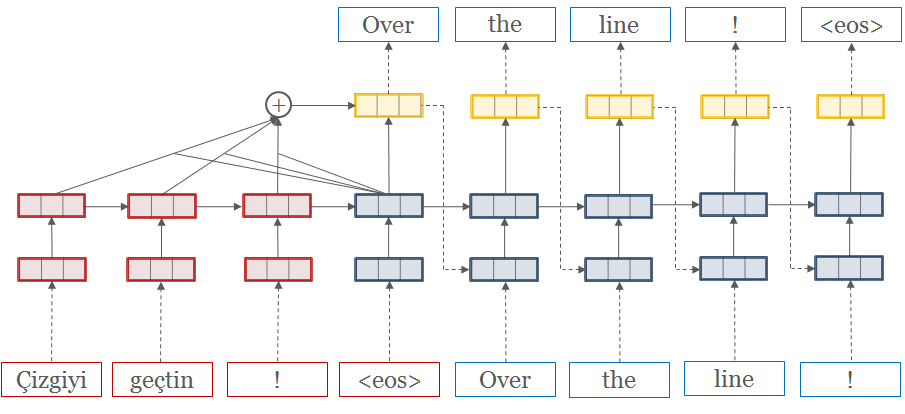

***First Go to Runtime and  change the runtime type to GPU.***

# 1.   Prepare the Data

Parallel corpus is collected from various sources. It is possible to collect news texts, drama / movie subtitles, Wikipedia, etc., as well as data sets for evaluation of translation systems disclosed by WMT, a machine translation competition, and use them in translation systems.

## Git Clone 
First Git clone the OpenNMT source

In [1]:
!git clone https://github.com/OpenNMT/OpenNMT-py

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 17624, done.
remote: Counting objects: 100% (580/580), done.
remote: Compressing objects: 100% (302/302), done.
remote: Total 17624 (delta 339), reused 459 (delta 268), pack-reused 17044
Receiving objects: 100% (17624/17624), 273.80 MiB | 35.26 MiB/s, done.
Resolving deltas: 100% (12639/12639), done.


## Install OpenNMT by Pip

In [2]:
# Install OpenNMT-py 2.x
# NOTE: By the end of the insatallation, it might ask for restarting the runtime...
# In this case, just click the "RESTART RUNTIME" button.

!pip3 install OpenNMT-py

     |████████████████████████████████| 216 kB 803 kB/s eta 0:00:01
     |████████████████████████████████| 15.8 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 4.1 MB/s  eta 0:00:01
     |████████████████████████████████| 73 kB 1.5 MB/s  eta 0:00:01
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.8.1
    Uninstalling torchtext-0.8.1:
      Successfully uninstalled torchtext-0.8.1


## Import Other Library

In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)

1.7.1+cu110
11.0


In [4]:
# Check NVIDIA Cuda Version

!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


## Check the Dataset

In [5]:
# Listed the files

!ls OpenNMT-py/data

README.md	    ggnnsrc.txt       sample.bpe       tgt-train.txt
align_data.yaml     ggnnsrcvocab.txt  sample.sp.model  tgt-val.txt
data.yaml	    ggnntgt.txt       src-test.txt     val.src-tgt.talp
data_features	    ggnntgtvocab.txt  src-train.txt    vocab-train.src
data_lm		    lm_data.yaml      src-val.txt      vocab-train.tgt
features_data.yaml  morph	      test_model2.src
ggnn_data.yaml	    morph_data.yaml   test_model2.tgt


In [18]:
# Print the first 5 lines of the source train file

!head -n 10 OpenNMT-py/data/src-train.txt

It is not acceptable that , with the help of the national bureaucracies , Parliament &apos;s legislative prerogative should be made null and void by means of implementing provisions whose content , purpose and extent are not laid down in advance .
Federal Master Trainer and Senior Instructor of the Italian Federation of Aerobic Fitness , Group Fitness , Postural Gym , Stretching and Pilates; from 2004 , he has been collaborating with Antiche Terme as personal Trainer and Instructor of Stretching , Pilates and Postural Gym .
&quot; Two soldiers came up to me and told me that if I refuse to sleep with them , they will kill me . They beat me and ripped my clothes .
Yes , we also say that the European budget is not about the duplication of national budgets , but about delivering common goals beyond the capacity of nation states where European funds can realise economies of scale or create synergies .

They would be abiding by the principle of the UN , which precludes military action except

In [7]:
# Check the number of lines in the source file

!echo "Number of lines:" && wc -l OpenNMT-py/data/src-train.txt

Number of lines:
10000 OpenNMT-py/data/src-train.txt


# 2.   Cleaning

The collected data must be refined. The refinement process includes sorting sentences by corpus in both languages, and eliminating noise such as special characters.

We need to build a YAML configuration file to specify the data that will be used:

In [8]:
# Create the YAML configuration file
# On a regular machine, you can create it manually or with nano

config = '''      # dataset_en_de.yaml

## Where the samples will be written
save_data: saved-data/run/example

## Where the vocab(s) will be written
src_vocab: saved-data/run/example.vocab.src
tgt_vocab: saved-data/run/example.vocab.tgt

## Where the model will be saved
save_model: model/model

# Prevent overwriting existing files in the folder
overwrite: False

# Corpus opts:
data:
    corpus_1:
        path_src: OpenNMT-py/data/src-train.txt
        path_tgt: OpenNMT-py/data/tgt-train.txt
    valid:
        path_src: OpenNMT-py/data/src-val.txt
        path_tgt: OpenNMT-py/data/tgt-val.txt

world_size: 1
gpu_ranks: [0]

# Remove or modify these lines for bigger files
train_steps: 3000
valid_steps: 300

early_stopping: 5
'''

with open("dataset_en_de.yaml", "w+") as config_yaml:
  config_yaml.write(config)

!cat dataset_en_de.yaml

      # dataset_en_de.yaml

## Where the samples will be written
save_data: saved-data/run/example

## Where the vocab(s) will be written
src_vocab: saved-data/run/example.vocab.src
tgt_vocab: saved-data/run/example.vocab.tgt

## Where the model will be saved
save_model: model/model

# Prevent overwriting existing files in the folder
overwrite: False

# Corpus opts:
data:
    corpus_1:
        path_src: OpenNMT-py/data/src-train.txt
        path_tgt: OpenNMT-py/data/tgt-train.txt
    valid:
        path_src: OpenNMT-py/data/src-val.txt
        path_tgt: OpenNMT-py/data/tgt-val.txt

world_size: 1
gpu_ranks: [0]

# Remove or modify these lines for bigger files
train_steps: 3000
valid_steps: 300

early_stopping: 5


# 3. Subword Tokenization

Refine spacing using the POS tagger or segmenter for each language. English may have refinement issues in upper / lower case.
After the spacing is refined, use Byte Pair Encoding (BPE) using public tools such as Subword or WordPiece. This allows you to perform additional segments and construct a vocabulary list. At this time, the segmented models learned for the BPE segment should be kept for future use.

From this configuration, we can build the vocab(s) that will be necessary to train the model

*Note:*
- `-n_sample` is required here -- it represents the number of lines sampled from each corpus to build the vocab.

- This configuration is the simplest possible, without any tokenization or other transforms. See other example configurations for more complex pipelines.


In [9]:
# Build Vocabulary

!onmt_build_vocab -config dataset_en_de.yaml -n_sample -1

[2021-10-03 04:19:06,773 INFO] Counter vocab from -1 samples.
[2021-10-03 04:19:06,773 INFO] n_sample=-1: Build vocab on full datasets.
[2021-10-03 04:19:06,791 INFO] corpus_1's transforms: TransformPipe()
[2021-10-03 04:19:06,793 WARNING] Empty line exists in corpus_1#4.
[2021-10-03 04:19:07,192 INFO] Counters src:24995
[2021-10-03 04:19:07,192 INFO] Counters tgt:35815


In [10]:
# Check if GPU is active
# If not, go to "Runtime" menu > "Change runtime type" > "GPU"

!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-b4f43383-13af-1387-4ced-d23616a54f0b)


In [11]:
# Make sure the GPU is visable to PyTorch

import torch

gpu_id = torch.cuda.current_device()
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(gpu_id))

True
Tesla P100-PCIE-16GB


# 4. Train

Train the seq2seq model using prepared datasets. Depending on the amount, you can train with a single GPU, or use multiple GPUs in parallel to reduce training time.

To train a model, we need to add the following to the YAML configuration file:

- the vocabulary path(s) that will be used: can be that generated by onmt_build_vocab;
- training specific parameters.

This configuration will run the default model, which consists of a 2-layer LSTM with 500 hidden units on both the encoder and decoder. It will run on a single GPU (world_size 1 & gpu_ranks [0]).

Before the training process actually starts, the *.vocab.pt together with *.transforms.pt will be dumpped to -save_data with configurations specified in -config yaml file. We'll also generate transformed samples to simplify any potentially required visual inspection. The number of sample lines to dump per corpus is set with the -n_sample flag.

In [12]:
# Train the NMT model

!onmt_train -config dataset_en_de.yaml

[2021-10-03 04:19:09,911 INFO] Missing transforms field for corpus_1 data, set to default: [].
[2021-10-03 04:19:09,911 WARNING] Corpus corpus_1's weight should be given. We default it to 1 for you.
[2021-10-03 04:19:09,911 INFO] Missing transforms field for valid data, set to default: [].
[2021-10-03 04:19:09,911 INFO] Parsed 2 corpora from -data.
[2021-10-03 04:19:09,911 INFO] Get special vocabs from Transforms: {'src': set(), 'tgt': set()}.
[2021-10-03 04:19:09,911 INFO] Loading vocab from text file...
[2021-10-03 04:19:09,912 INFO] Loading src vocabulary from saved-data/run/example.vocab.src
[2021-10-03 04:19:09,973 INFO] Loaded src vocab has 24995 tokens.
[2021-10-03 04:19:09,989 INFO] Loading tgt vocabulary from saved-data/run/example.vocab.tgt
[2021-10-03 04:19:10,079 INFO] Loaded tgt vocab has 35815 tokens.
[2021-10-03 04:19:10,099 INFO] Building fields with vocab in counters...
[2021-10-03 04:19:10,174 INFO]  * tgt vocab size: 35819.
[2021-10-03 04:19:10,209 INFO]  * src vocab

# 5. Translate

Now that the model has been created, you can start translating.

In [13]:
# Make a smaller file with 20 sentences instead of 2737
!head -20 OpenNMT-py/data/src-test.txt > OpenNMT-py/data/src-test-20.txt

!wc -l OpenNMT-py/data/src-test.txt         # full data test
!wc -l OpenNMT-py/data/src-test-20.txt      # 20 sentences of data test

2737 OpenNMT-py/data/src-test.txt
20 OpenNMT-py/data/src-test-20.txt


In [14]:
# Translate the selected 20 sentences

!python OpenNMT-py/translate.py -model model/model_step_3000.pt -src OpenNMT-py/data/src-test-20.txt -output OpenNMT-py/data/pred-20.txt -gpu 0 -replace_unk -verbose -beam_size 1
# Use GPU 0

[2021-10-03 04:26:49,198 INFO] Translating shard 0.
[2021-10-03 04:26:49,351 INFO] 
SENT 1: ['Orlando', 'Bloom', 'and', 'Miranda', 'Kerr', 'still', 'love', 'each', 'other']
PRED 1: 4 € 5 km , die von der Galerie benutzt werden kann , benutzt zu ...
PRED SCORE: -30.2997

[2021-10-03 04:26:49,351 INFO] 
SENT 2: ['Actors', 'Orlando', 'Bloom', 'and', 'Model', 'Miranda', 'Kerr', 'want', 'to', 'go', 'their', 'separate', 'ways', '.']
PRED 2: Jeder Roswitha und die Forencrew finden sich die Vorortverkehre Retorte spielen .
PRED SCORE: -32.7669

[2021-10-03 04:26:49,351 INFO] 
SENT 3: ['However', ',', 'in', 'an', 'interview', ',', 'Bloom', 'has', 'said', 'that', 'he', 'and', 'Kerr', 'still', 'love', 'each', 'other', '.']
PRED 3: Die Arbeitslosigkeit hat jedoch jedoch sehr klar , dass er die meisten Richtlinien so gut angewandt werden .
PRED SCORE: -39.4014

[2021-10-03 04:26:49,352 INFO] 
SENT 4: ['Miranda', 'Kerr', 'and', 'Orlando', 'Bloom', 'are', 'parents', 'to', 'two-year-old', 'Flynn', '.'

# 6. Detokenization

Even after the translation process is finished, it is still in a segment, so it is different from the actual sentence structure used by real people. Thus, when you perform a detoxification process, it is returned in the form of the actual sentence.

In [15]:
!sed -i "s/@@ //g"  OpenNMT-py/data/pred-20.txt

# 7. Evaluating

Quantitative evaluation is performed on the sentence thus obtained. BLEU is a quantitative evaluation method for machine translation. You can see which model is superior by comparing it to the BLEU score you are comparing.

In [16]:
#!perl OpenNMT-py/tools/multi-bleu-detok.perl OpenNMT-py/data/ref.txt < OpenNMT-py/data/pred.txt
!perl OpenNMT-py/tools/multi-bleu-detok.perl OpenNMT-py/data/src-test-20.txt -output OpenNMT-py/data/pred-20.txt

^C
